In [1]:
import sys
if not '../src' in sys.path:
    sys.path.insert(0, '../src')

import lightkurve as lk
from tesscentroidvetting import centroid_vetting
#
# def centroid_vetting(tpf, epochs, tot_transit_dur, plot=True, **kwargs):
#
#    Miinimum Parameters: tpf - Target Pixel File
#                         epochs - [list] of transits to analyse
#                         transit_dur_tot    - [float] Total transit duration in days
#    Optional parameters: plot               - [boolean] default = True
#                         plot_flux_centroid - [boolean] default = False 
#                         full_transit_dur   - (days) [float]   default = tot_transit_dur * 0.8
#                         oot_inner_margin   - (days) [float]   default = tot_transit_dur * 0.75
#                         oot_outer_margin   - (days) [float]   default = oot_inner_margin + tot_transit_dur
#                    
#    In transit times    : Epoch(s) ± full_transit_dur/2
#    Out of transit times: Between <Epoch(s) ± oot_outer_margin/2>  and  <Epoch(s) ± oot_inner_margin/2>#
#

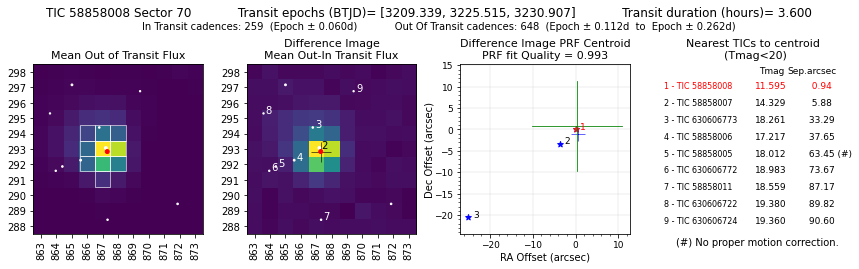

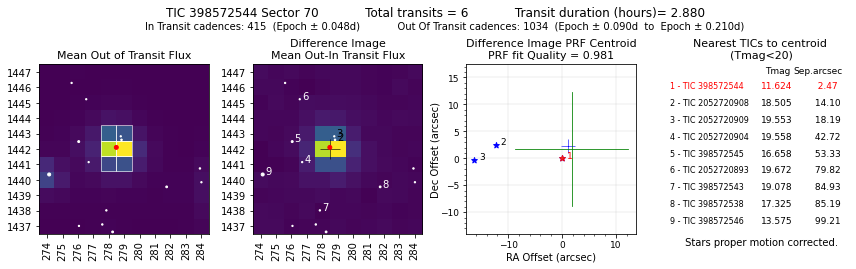

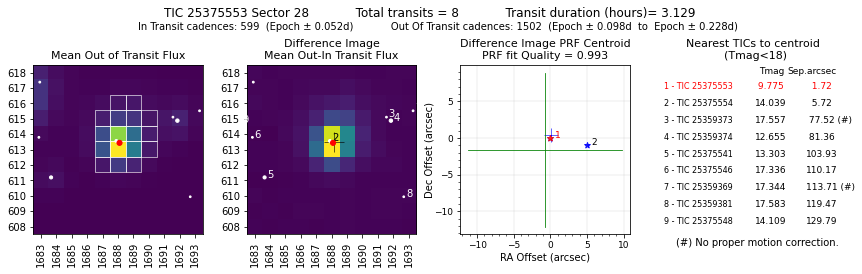

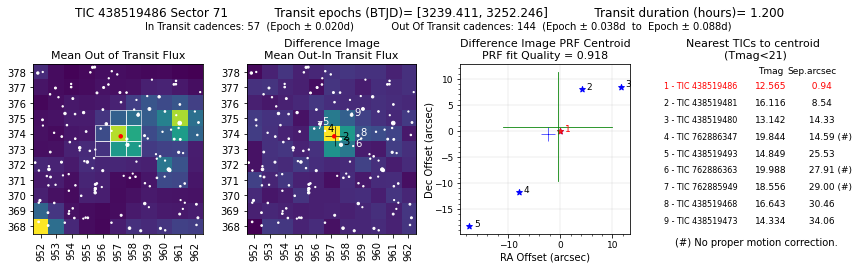

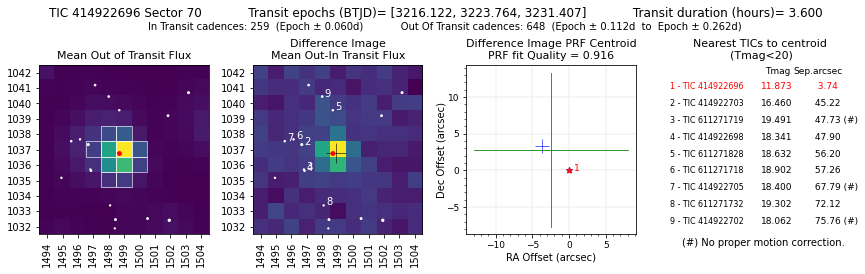

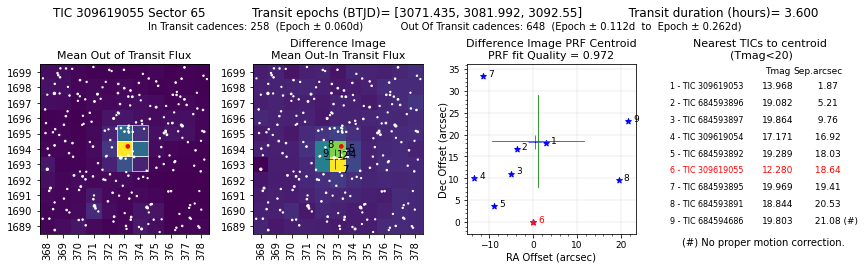

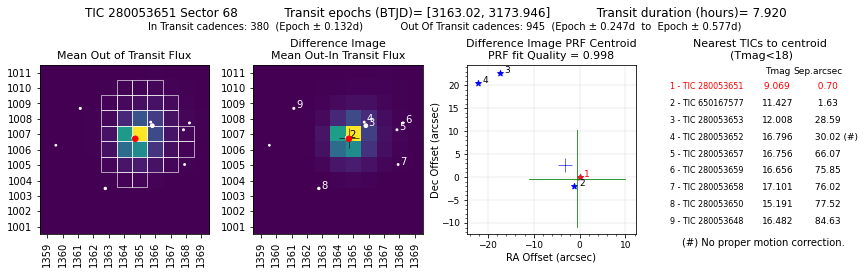

In [3]:
for r in range(7):
    if r==0:
        # TOI 6842.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3183841
        TIC_ID = 58858008
        sector = 70    
        ttimes = [3209.3388, 3225.5151, 3230.9072]
        tot_dur = 0.15
    if r==1:
        # WASP28-B  Confirmed Planet https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3184216
        TIC_ID = 398572544   #wasp28-B 
        sector = 70
        ttimes = [3209.352289,3212.761298,3216.170306,3222.988322,3226.397330,3229.806344]
        tot_dur = 0.12
    if r==2:
        # TOI 143.01 Confirmed Planet - example from TESS-Plots (prf)
        TIC_ID = 25375553
        sector = 28 
        ttimes = [2062.786506,2065.09701,2067.407518,2069.718025,2076.649543,2078.960049,2081.270555,2083.581062]
        tot_dur = 3.129/24
    if r == 3:
        # TOI 5403.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3203688
        TIC_ID = 438519486
        sector = 71
        ttimes = [3239.411204, 3252.246261]
        tot_dur = 0.05
    if r == 4:
        #   https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3190029?comment=5243900&page=1
        TIC_ID = 414922696
        sector = 70
        ttimes = [3216.121833, 3223.764306, 3231.406779]
        tot_dur = 0.15
    if r == 5:
        # NEB  https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3080388
        TIC_ID = 309619055
        sector = 65
        ttimes = [3071.435318, 3081.99241, 3092.549500]
        tot_dur = 0.15    
    if r == 6:
        # EB or NEB https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3111229
        TIC_ID = 280053651
        sector = 68
        ttimes= [3163.019622, 3173.946100]
        tot_dur = 0.33

    TICstr = 'TIC '+str(TIC_ID)
  
    sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
    tpf = sres[0].download()
    #####
    results = centroid_vetting(tpf, ttimes, tot_dur, plot_flux_centroid = True)
    #####

In [22]:
# last run
results

{'ticid': 280053651,
 'sector': 68,
 'valid_transit_epochs': [3163.019622, 3173.9461],
 'transit_duration': 0.33,
 'inTransit_cadences': 380,
 'ooTransit_cadences': 945,
 'inTransit_margin': 0.132,
 'ooTransit_inner_margin': 0.247,
 'ooTransit_outer_margin': 0.577,
 'tic_pos': (5.711118956078119, 5.7064651441211875),
 'flux_centroid_pos': (5.843013250087572, 5.861309318617957),
 'prf_centroid_pos': (5.695612415092455, 5.736281367338847),
 'prf_fit_quality': 0.9982381851246884,
 'tic_offset': 0.69944688562318,
 'nearest_tics': <Table length=20>
     ID            ra         ...     dec_no_pm      dstArcSec_no_pm  
    str9        float64       ...      float64           float64      
 --------- ------------------ ... ----------------- ------------------
 280053651 45.933028375493635 ... -76.2694433397788 0.8216887060718442
 650167577 45.931654422074445 ... -76.2699440076057 1.8006384806406976
 280053653  45.91261325030476 ... -76.2631348245344 28.584820451698196
 280053652 45.9070378095

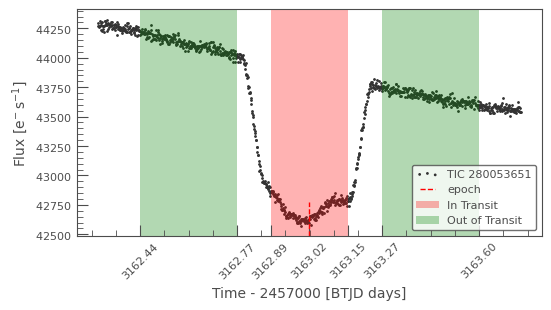

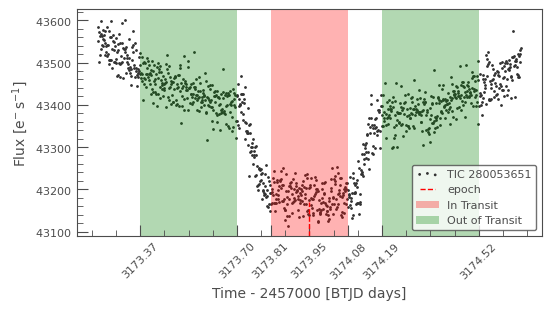

In [7]:
# ---- additional lightcurve plots to help visualization of the time span measured ----
#--------------- Sam Lee - https://github.com/orionlee    -----------------------------
#--------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

transit_half_duration = results['inTransit_margin']
oot_inner_relative = results['ooTransit_inner_margin']
oot_outer_relative = results['ooTransit_outer_margin']
ttimes = results['valid_transit_epochs']
# 1. the lightcurve of the aperture pixels
lc_target = tpf.to_lightcurve().remove_nans()
'''
# 2. the lightcurve of the pixel with the biggest difference flux
# it's useful for cases that the pixel is off target, diagnose whether the
# pixel has variation significantly different from the aperture such that
# the out-of-transit range contains skewed data, thus skewing the difference calculation.
# Example of such targets:  TIC 6904949
#  https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/subjects/91668169

brightest_px_yx = np.unravel_index(np.nanargmax(img_diff), img_diff.shape)
brightest_px_mask = np.full(tpf.flux[0].shape, False, dtype=bool)
brightest_px_mask[brightest_px_yx[0], brightest_px_yx[1]] = True
lc_brightest_px = tpf.to_lightcurve(aperture_mask=brightest_px_mask).remove_nans()
lc_brightest_px.label = f"Largest Flux Diff Pixel at {brightest_px_yx}"
'''
for i,T0 in enumerate(ttimes):
    if i>5 : break
    lc = lc_target.truncate(T0 - oot_outer_relative * 1.25, T0 + oot_outer_relative * 1.25)
    with plt.style.context(lk.MPLSTYLE):
        ax = plt.figure(figsize=(6, 3)).gca()
        ax = lc.scatter(ax=ax)
        ax.axvline(T0, color="red", ymax=0.15, linewidth=1, linestyle="--", label="epoch")
        ax.axvspan(T0 - transit_half_duration, T0 + transit_half_duration, facecolor="red", alpha=0.3, label="In Transit")
        ax.axvspan(T0 - oot_outer_relative, T0 - oot_inner_relative, facecolor="green", alpha=0.3, label="Out of Transit")
        # no label to avoid double legend
        ax.axvspan(T0 + oot_inner_relative, T0 + oot_outer_relative, facecolor="green", alpha=0.3)
        ax.set_xticks([T0 - oot_outer_relative,T0 - oot_inner_relative,T0 - transit_half_duration,
                       T0, T0 + transit_half_duration, T0 + oot_inner_relative, T0 + oot_outer_relative])
        ax.tick_params(axis='x', labelrotation=45)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        #ax.ticklabel_format(useOffset=False)
        ax.legend(loc="lower right", fontsize=8)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(8)
        for item in ([ax.xaxis.label, ax.yaxis.label]): item.set_fontsize(10)
    #axs.append(ax)